### Wordcloud Quran and Hadith

In [1]:
import pandas as pd
import oj_scripts as oj
import importlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
importlib.reload(oj)

<module 'oj_scripts' from '/Users/omarjahangir/Projects/ML-Quran/oj_scripts.py'>

In [3]:
Quran_df = oj.Quran()

clean = oj.cleaner(Quran_df['Verse Text'])
Quran_df["Clean Text"] = clean
Quran_df.head()

,Surah Name,Surah Number,Verse Number,Verse Text,Clean Text
0,الفاتحة,1,1,بِسْمِ اللَّهِ الرَّحْمَنِ الرَّحِيمِ,بسم الله الرحمن الرحيم
1,الفاتحة,1,2,الْحَمْدُ لِلَّهِ رَبِّ الْعَالَمِينَ,الحمد لله رب العالمين
2,الفاتحة,1,3,الرَّحْمَنِ الرَّحِيمِ,الرحمن الرحيم
3,الفاتحة,1,4,مَالِكِ يَوْمِ الدِّينِ,مالك يوم الدين
4,الفاتحة,1,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,اياك نعبد واياك نستعين


## Wordcloud

In [4]:
from wordcloud import WordCloud

In [30]:
trans_df = oj.Translation()
trans_df

,Surah Name,Surah Number,Verse Number,Verse Text
0,الفاتحة,1,1,"In the name of Allah, the Entirely Merciful, t..."
1,الفاتحة,1,2,"[All] praise is [due] to Allah, Lord of the wo..."
2,الفاتحة,1,3,"The Entirely Merciful, the Especially Merciful,"
3,الفاتحة,1,4,Sovereign of the Day of Recompense.
4,الفاتحة,1,5,It is You we worship and You we ask for help.
...,...,...,...,...
6231,الناس,114,2,The Sovereign of mankind.
6232,الناس,114,3,"The God of mankind,"
6233,الناس,114,4,From the evil of the retreating whisperer -
6234,الناس,114,5,Who whispers [evil] into the breasts of mankind -


In [38]:
import string

In [31]:
joined_quran = trans_df['Verse Text'].str.cat(sep=' ')

In [44]:
cleaned = joined_quran.translate(str.maketrans('', '', string.punctuation))
cleaned[:101]


'In the name of Allah the Entirely Merciful the Especially Merciful All praise is due to Allah Lord of'

In [48]:
wordcloud = WordCloud(background_color="white", 
                      max_words=100,
                      contour_width=3, 
                      contour_color='steelblue',
                      width = 600, height = 600)

In [49]:
wordcloud.generate(cleaned)


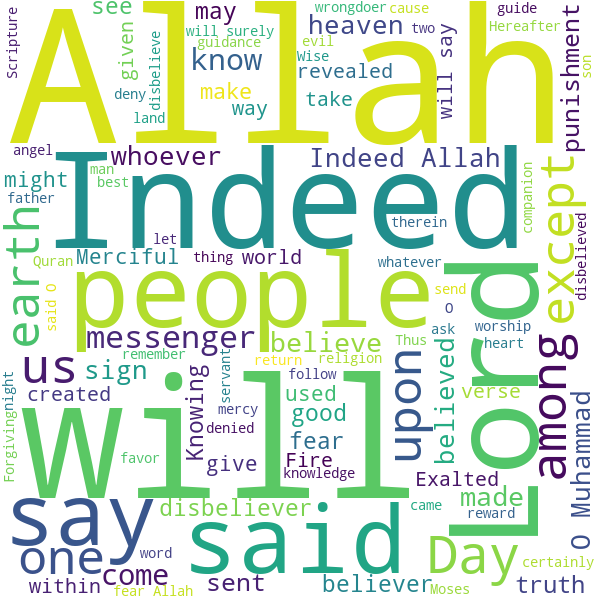

In [50]:
wordcloud.to_image()

In [51]:
from spacy.lang.en import English


In [52]:
nlp = English()


In [72]:
my_doc = nlp(cleaned)

# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)

from spacy.lang.en.stop_words import STOP_WORDS

# Create list of word tokens after removing stopwords
filtered_sentence =[] 

for word in token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        filtered_sentence.append(word) 
print(token_list[:10])
print(filtered_sentence[:10])   

['In', 'the', 'name', 'of', 'Allah', 'the', 'Entirely', 'Merciful', 'the', 'Especially']
['Allah', 'Entirely', 'Merciful', 'Especially', 'Merciful', 'praise', 'Allah', 'Lord', 'worlds', ' ']


In [73]:
len(token_list), len(filtered_sentence)

(158988, 53423)

In [68]:
filtered_ = " ".join(filtered_sentence)


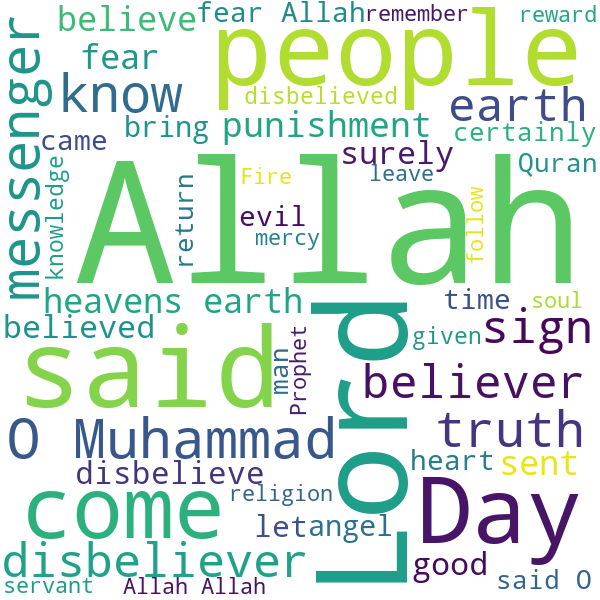

In [71]:
wordcloud = WordCloud(background_color="white", 
                      max_words=50,
                      contour_width=3, 
                      contour_color='steelblue',
                      width = 600, height = 600)

wordcloud.generate(filtered_)
wordcloud.to_image()

## LDA

In [100]:
import gensim
from gensim.utils import simple_preprocess
import nltk
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    """
    Will convert sentances to words
    """
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        
        
def remove_stopwords(texts):
    """
    Will remove stopwords
    """
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = trans_df['Verse Text'].values.tolist()
data_words = list(sent_to_words(data))

print(data_words[:10])

[['in', 'the', 'name', 'of', 'allah', 'the', 'entirely', 'merciful', 'the', 'especially', 'merciful'], ['all', 'praise', 'is', 'due', 'to', 'allah', 'lord', 'of', 'the', 'worlds'], ['the', 'entirely', 'merciful', 'the', 'especially', 'merciful'], ['sovereign', 'of', 'the', 'day', 'of', 'recompense'], ['it', 'is', 'you', 'we', 'worship', 'and', 'you', 'we', 'ask', 'for', 'help'], ['guide', 'us', 'to', 'the', 'straight', 'path'], ['the', 'path', 'of', 'those', 'upon', 'whom', 'you', 'have', 'bestowed', 'favor', 'not', 'of', 'those', 'who', 'have', 'evoked', 'your', 'anger', 'or', 'of', 'those', 'who', 'are', 'astray'], ['alif', 'lam', 'meem'], ['this', 'is', 'the', 'book', 'about', 'which', 'there', 'is', 'no', 'doubt', 'guidance', 'for', 'those', 'conscious', 'of', 'allah'], ['who', 'believe', 'in', 'the', 'unseen', 'establish', 'prayer', 'and', 'spend', 'out', 'of', 'what', 'we', 'have', 'provided', 'for', 'them']]


In [96]:
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:10])

[['name', 'allah', 'entirely', 'merciful', 'especially', 'merciful'], ['praise', 'due', 'allah', 'lord', 'worlds'], ['entirely', 'merciful', 'especially', 'merciful'], ['sovereign', 'day', 'recompense'], ['worship', 'ask', 'help'], ['guide', 'us', 'straight', 'path'], ['path', 'upon', 'bestowed', 'favor', 'evoked', 'anger', 'astray'], ['alif', 'lam', 'meem'], ['book', 'doubt', 'guidance', 'conscious', 'allah'], ['believe', 'unseen', 'establish', 'prayer', 'spend', 'provided']]


In [91]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [101]:
from pprint import pprint

# number of topics
num_topics = 5

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics,
                                       passes=100)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics(), width = 100) #pprint allows for things to be printed in a easier to read manner (with tabs).
doc_lda = lda_model[corpus]

[(0,
  '0.035*"punishment" + 0.015*"day" + 0.013*"fire" + 0.012*"see" + 0.011*"earth" + 0.011*"indeed" '
  '+ 0.010*"therein" + 0.009*"said" + 0.009*"upon" + 0.008*"signs"'),
 (1,
  '0.025*"allah" + 0.022*"indeed" + 0.019*"day" + 0.012*"night" + 0.010*"people" + 0.008*"life" + '
  '0.008*"earth" + 0.008*"give" + 0.007*"whoever" + 0.007*"like"'),
 (2,
  '0.072*"allah" + 0.017*"indeed" + 0.015*"earth" + 0.015*"heavens" + 0.013*"one" + 0.011*"might" '
  '+ 0.011*"exalted" + 0.011*"knowing" + 0.010*"created" + 0.010*"whatever"'),
 (3,
  '0.046*"allah" + 0.032*"said" + 0.025*"indeed" + 0.020*"lord" + 0.016*"upon" + 0.013*"among" + '
  '0.013*"people" + 0.012*"good" + 0.010*"fear" + 0.009*"righteous"'),
 (4,
  '0.052*"allah" + 0.033*"say" + 0.028*"indeed" + 0.024*"lord" + 0.018*"people" + 0.017*"us" + '
  '0.013*"would" + 0.011*"except" + 0.010*"upon" + 0.009*"truth"')]
